## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras
import tensorflow as tf
# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [9]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    layer_input = tf.keras.Input(x_train.shape[1])
    X = tf.keras.layers.Dense(units=512, activation='relu')(layer_input)
    X = tf.keras.layers.Dense(units=256, activation='relu')(X)
    X = tf.keras.layers.Dense(units=128, activation='relu')(X)
    out = tf.keras.layers.Dense(units=10, activation='softmax')(X)
    
    model = tf.keras.Model(inputs=[layer_input], outputs=[out])
    return model
model = build_mlp()

In [13]:
"""
Compile 模型
"""
opt = tf.keras.optimizers.SGD(lr=0.001)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)

In [14]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 2s 12ms/step - loss: 2.2525 - accuracy: 0.1583 - val_loss: 2.2092 - val_accuracy: 0.1932
Epoch 2/500
196/196 [==============================] - 2s 11ms/step - loss: 2.1747 - accuracy: 0.2236 - val_loss: 2.1480 - val_accuracy: 0.2381
Epoch 3/500
196/196 [==============================] - 2s 11ms/step - loss: 2.1226 - accuracy: 0.2486 - val_loss: 2.1020 - val_accuracy: 0.2547
Epoch 4/500
196/196 [==============================] - 2s 11ms/step - loss: 2.0815 - accuracy: 0.2630 - val_loss: 2.0647 - val_accuracy: 0.2674
Epoch 5/500
196/196 [==============================] - 2s 11ms/step - loss: 2.0463 - accuracy: 0.2740 - val_loss: 2.0310 - val_accuracy: 0.2812
Epoch 6/500
196/196 [==============================] - 2s 11ms/step - loss: 2.0151 - accuracy: 0.2857 - val_loss: 2.0024 - val_accuracy: 0.2916
Epoch 7/500
196/196 [==============================] - 2s 11ms/step - loss: 1.9885 - accuracy: 0.2974 - val_loss: 1.9775 - val_accuracy:

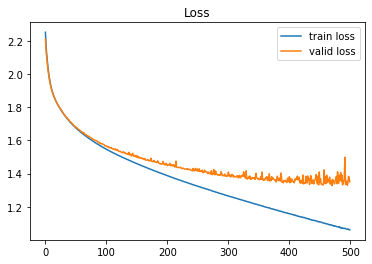

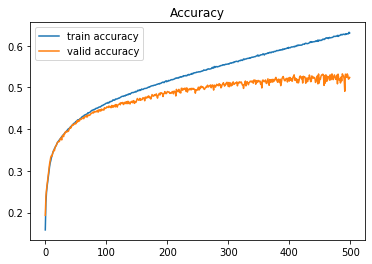

In [15]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()